캔들차트(Candlestick Chart)

In [ ]:
# 캔들차트(Candlestick Chart)는 주식의 시가(Open), 고가(High), 저가(Low), 종가(Close)를 시각화하는 대표적인 금융 차트
# 가격의 흐름과 변동성을 시각적으로 직관적으로 보여주며, 기술적 분석에서 널리 활용됩니다.

# mplfinance는 matplotlib 기반의 캔들차트 전용 라이브러리

In [ ]:
# 옵션	설명
# type='candle'	캔들 차트 (기본)
# style='yahoo'	스타일: 'classic', 'charles', 'yahoo' 등
# volume=True	하단에 거래량 바 표시
# mav=(5, 20)	이동평균선 표시
# title=...	차트 제목
# tight_layout=True	여백 자동 조절

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


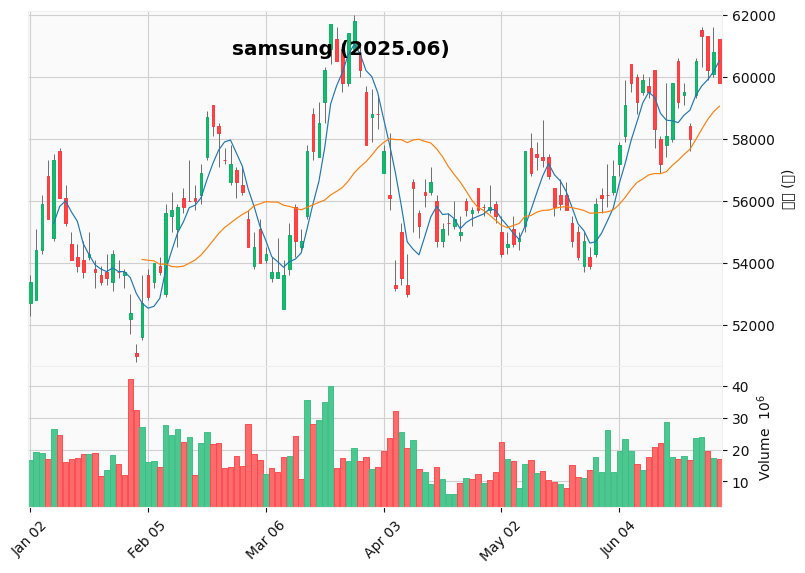

In [13]:
import mplfinance as mpf
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt


#wndows에서 한글이 잘 보이는 기본 폰트 설정 (예: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 깨짐 방지


import mplfinance as mpf
from pykrx import stock
import pandas as pd

# ▶️ 삼성전자 일별 데이터 가져오기
df = stock.get_market_ohlcv_by_date("2025-01-01", "2025-06-30", "005930")
df.index = pd.to_datetime(df.index)

# ▶️ 컬럼명을 영어로 변환 (mplfinance 호환)
df.rename(columns={
    '시가': 'Open',
    '고가': 'High',
    '저가': 'Low',
    '종가': 'Close',
    '거래량': 'Volume'
}, inplace=True)

# ▶️ 캔들차트 그리기
mpf.plot(
    df,
    type='candle',
    style='yahoo',
    title='samsung (2025.06)',
    ylabel='가격 (원)',
    volume=True,
    mav=(5, 20),
    tight_layout=True
)



## 주봉 캔들차트 예제: 삼성전자

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


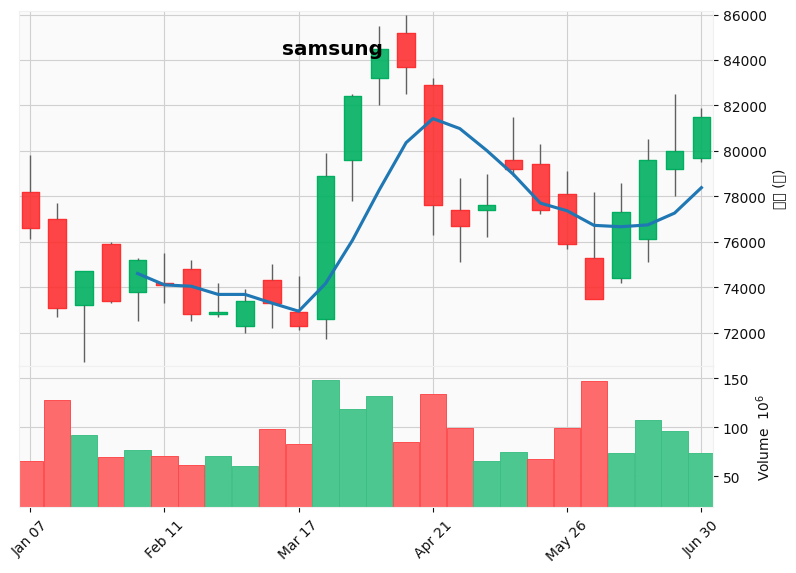

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from pykrx import stock

# ▶️ 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ▶️ 삼성전자 데이터 가져오기 (6개월)
df = stock.get_market_ohlcv_by_date("2024-01-01", "2024-06-30", "005930")
df.index = pd.to_datetime(df.index)

# ▶️ 컬럼명 영어로 변경 (mplfinance 요구사항)
df.rename(columns={
    '시가': 'Open',
    '고가': 'High',
    '저가': 'Low',
    '종가': 'Close',
    '거래량': 'Volume'
}, inplace=True)

# ▶️ 주봉 변환
weekly = df.resample('W').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

# ▶️ 캔들차트 시각화
mpf.plot(
    weekly,
    type='candle',
    style='yahoo',
    title='samsung',
    ylabel='가격 (원)',
    volume=True,
    mav=(5,),
    tight_layout=True
)


## 3. 월봉 캔들차트

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarn

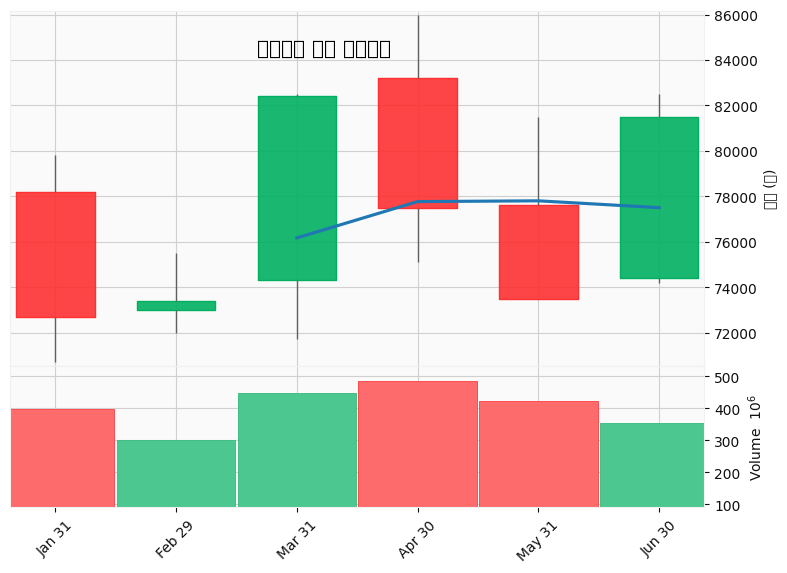

In [18]:
# ▶️ 월봉 변환
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from pykrx import stock

# ▶️ 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ▶️ 삼성전자 데이터 가져오기 (6개월)
df = stock.get_market_ohlcv_by_date("2024-01-01", "2024-06-30", "005930")
df.index = pd.to_datetime(df.index)

# ▶️ 컬럼명 영어로 변경 (mplfinance 요구사항)
df.rename(columns={
    '시가': 'Open',
    '고가': 'High',
    '저가': 'Low',
    '종가': 'Close',
    '거래량': 'Volume'
}, inplace=True)

# ▶️ 주봉 변환
weekly = df.resample('W').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})


# ▶️ 캔들차트
mpf.plot(
    monthly,
    type='candle',
    style='yahoo',
    title='삼성전자 월봉 캔들차트',
    ylabel='가격 (원)',
    volume=True,
    mav=(3,),
    tight_layout=True
)


### 일봉 데이터에 캔들차트와 5일, 20일 이동평균선(MA)을 함께 표시

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarn

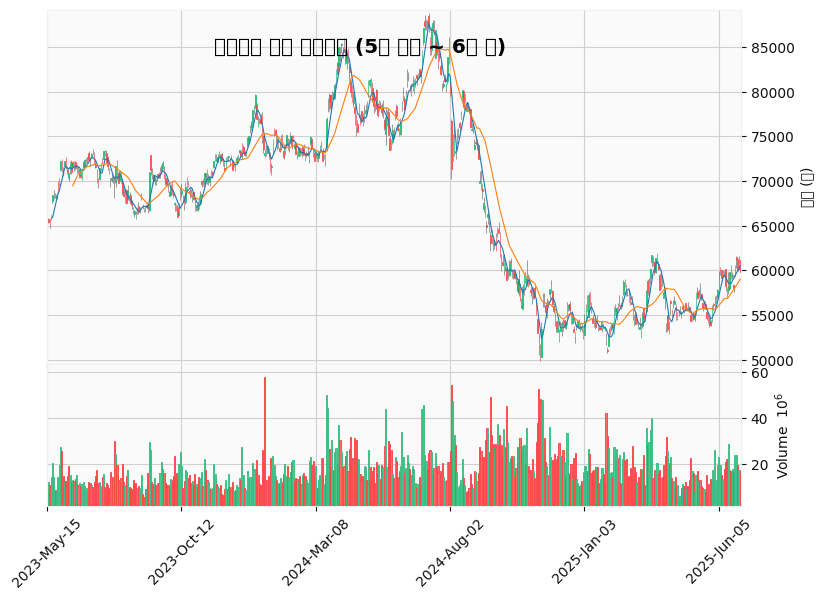

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from pykrx import stock

# ▶️ 한글 폰트 설정 (운영체제별 자동 설정)
import platform
system = platform.system()
if system == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif system == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

# ▶️ 데이터 수집: 최소 20일 이상 (이동평균선 표시 위해)
df = stock.get_market_ohlcv_by_date("2023-05-15", "2025-06-30", "005930")
df.index = pd.to_datetime(df.index)

# ▶️ 컬럼명 영어로 변경
df.rename(columns={
    '시가': 'Open',
    '고가': 'High',
    '저가': 'Low',
    '종가': 'Close',
    '거래량': 'Volume'
}, inplace=True)

# ▶️ 캔들차트 + 이동평균선 표시
mpf.plot(
    df,
    type='candle',
    style='yahoo',
    title='삼성전자 일봉 캔들차트 (5월 중순 ~ 6월 말)',
    ylabel='가격 (원)',
    volume=True,
    mav=(5, 20),  # 5일, 20일 이동평균선
    tight_layout=True
)


C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarni

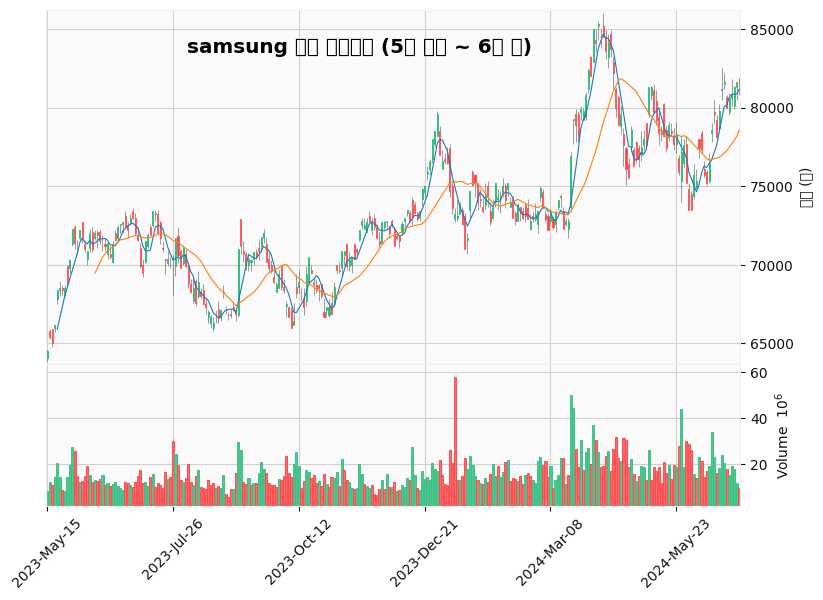

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from pykrx import stock
import platform
import matplotlib.font_manager as fm

# ▶️ 운영체제별 폰트 설정
system = platform.system()
if system == 'Windows':
    font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕
elif system == 'Darwin':  # macOS
    font_path = '/System/Library/Fonts/AppleGothic.ttf'
else:  # Linux (Nanum Gothic 예시)
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# ▶️ 폰트 설정
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# ▶️ 삼성전자 일봉 데이터 (20일 이상)
df = stock.get_market_ohlcv_by_date("2023-05-15", "2024-06-30", "005930")
df.index = pd.to_datetime(df.index)

# ▶️ 컬럼명 변경 (mplfinance 요구 형식)
df.rename(columns={
    '시가': 'Open',
    '고가': 'High',
    '저가': 'Low',
    '종가': 'Close',
    '거래량': 'Volume'
}, inplace=True)

# ▶️ 캔들차트 + 이동평균선
mpf.plot(
    df,
    type='candle',
    style='yahoo',
    title='samsung 일봉 캔들차트 (5월 중순 ~ 6월 말)',
    ylabel='가격 (원)',
    volume=True,
    mav=(5, 20),  # 5일선, 20일선
    tight_layout=True
)
